<a href="https://colab.research.google.com/github/nikhilpavithran/Practical-Deep-Learning-Book/blob/master/MRI_J31_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!wget "https://www.dropbox.com/s/duja4l7ce4ka720/tr_im.nii.gz"
#!wget "https://www.dropbox.com/s/0uq78sh2iqzjofv/tr_mask.nii.gz"
#!wget "https://www.dropbox.com/s/5amzci0b2sodhpn/val_im.nii.gz"
#!gdown --id 166HfFqjt-BsNFu24iWDPI0OQK117Q5x_
#!gdown --id 1YLRIWthhUMYxxaa_ieDmoxMxhBPjJ54K
#!gdown --id 1Y-7aFxqSiuolPx0uj--Ky7uJzoh1RUy5

!gdown --id 1SJoMelgRqb0EuqlTuq6dxBWf2j9Kno8S
!gdown --id 1MEqpbpwXjrLrH42DqDygWeSkDq0bi92f
!gdown --id 1Tl5PTS2rmajWKJMrYcZ2Na5DURvbbpit
!gdown --id 1zj4N_KV0LBko1VSQ7FPZ38eaEGNU0K6-

https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/

https://www.pluralsight.com/guides/image-classification-with-pytorch

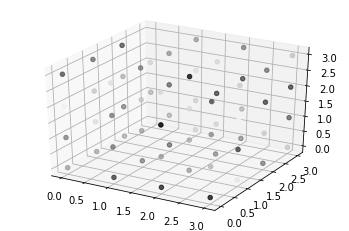

In [ ]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Make this bigger to generate a dense grid.
N = 4

# Create some random data.
volume = np.random.rand(N, N, N)

# Create the x, y, and z coordinate arrays.  We use 
# numpy's broadcasting to do all the hard work for us.
# We could shorten this even more by using np.meshgrid.
x = np.arange(volume.shape[0])[:, None, None]
y = np.arange(volume.shape[1])[None, :, None]
z = np.arange(volume.shape[2])[None, None, :]
x, y, z = np.broadcast_arrays(x, y, z)

# Turn the volumetric data into an RGB array that's
# just grayscale.  There might be better ways to make
# ax.scatter happy.
c = np.tile(volume.ravel()[:, None], [1, 3])

# Do the plotting in a single call.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x.ravel(),
           y.ravel(),
           z.ravel(),
           c=c)

In [ ]:
for x in range(0, 1):
  print(x)

0


/content
total 178224
drwxr-xr-x 1 root root      4096 Jan 20 17:27 sample_data
-rw-r--r-- 1 root root 159220922 Jan 31 13:34 tr_im.nii.gz
-rw-r--r-- 1 root root   1430936 Jan 31 13:34 tr_mask.nii.gz
-rw-r--r-- 1 root root  14839182 Jan 31 13:34 val_im.nii.gz
-rw-r--r-- 1 root root    236905 Jan 31 13:34 tr_lungmasks_updated.nii.gz
-rw-r--r-- 1 root root   6759312 Jan 31 13:41 test.out
(512, 512, 100)
(512, 512, 100)
(512, 512, 100)
frame {-1414.8937: 273, -1408.5106: 55219, -1402.1277: 280, -1210.6383: 2, -1204.2554: 1, -1197.8723: 1, -1178.7234: 6, -1172.3405: 4, -1165.9574: 7, -1159.5745: 3, -1153.1915: 7, -1146.8085: 12, -1140.4255: 16, -1134.0426: 28, -1127.6595: 25, -1121.2766: 35, -1114.8937: 41, -1108.5106: 10, -1102.1277: 94, -1095.7446: 100, -1089.3617: 95, -1082.9788: 134, -1076.5957: 213, -1070.2128: 226, -1063.8298: 292, -1057.4468: 401, -1051.0638: 588, -1044.6809: 699, -1038.2979: 695, -1031.9149: 175, -1025.5319: 3122, -1019.1489: 3043, -1012.7659: 4988, -1006.383: 5363

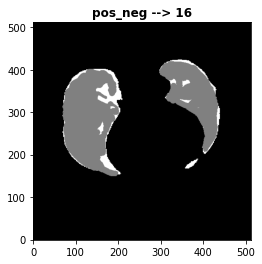

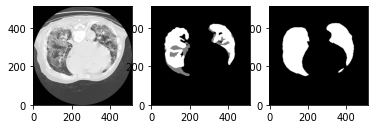

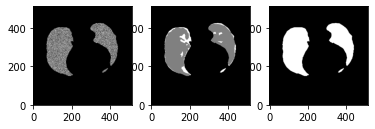

In [42]:
import nibabel as nib
import os
import numpy as np
import sys
from numpy import *
import matplotlib.pyplot as plt 
import cv2

# - https://in.mathworks.com/help/images/ref/imbinarize.html
def imcomplement(image):
  """Equivalent to matlabs imcomplement function"""
  min_type_val = np.iinfo(image.dtype).min
  max_type_val = np.iinfo(image.dtype).max
  return min_type_val + max_type_val - image

def shImg(image, txt):
  plt.imshow(image, cmap="gray", origin="lower")
  plt.title(txt, fontweight ="bold") 
 # plt.show()   

def unq(arr1, txt):
  unique, counts = np.unique(arr1, return_counts=True)
  print(txt,dict(zip(unique, counts)))

!pwd
!ls -lrt
data_path="/content"
tr_filename = os.path.join(data_path, 'tr_im.nii.gz')
im = nib.load(tr_filename)
im1 = im.dataobj;
print(im.shape)

mask_filename = os.path.join(data_path, 'tr_mask.nii.gz')
mim = nib.load(mask_filename)
print(mim.shape)

#Lung Mask data
lung_mask_filename = os.path.join(data_path, 'tr_lungmasks_updated.nii.gz')
mlim = nib.load(lung_mask_filename);
print(mlim.shape)

im_numpy = np.asanyarray(im.dataobj).astype(np.float32)
mim_numpy = np.asanyarray(mim.dataobj).astype(np.float32)
mlim_numpy = np.asanyarray(mlim.dataobj).astype(np.float32)

# Declare a 2 diamentional array
inp = np.zeros((512, 512))
lab = np.zeros((512, 512))
for x in range(0, 1):
  #print(x) 
  #frame = squeeze(im(:,:, i));
  frame = im_numpy[..., x]
  unq(frame,"frame")

  #print(frame.shape)
  #print(frame)
  mlim1 = mlim_numpy[..., x]
  
  plt.imshow(mlim1.T, cmap="gray", origin="lower")
  plt.title('mlim1', fontweight ="bold") 
  #plt.show() 
  shImg(mlim1.T,"mlim1")

  #imshow(slice.T, cmap="gray", origin="lower")
  #print(mlim1)
  #Lung mask (make sure it is a binary mask)
  #mlim1(mlim1(:)>1) = 1;
  np.set_printoptions(threshold=sys.maxsize)

  mlim1[mlim1 > 1] = 1;
  plt.imshow(mlim1.T, cmap="gray", origin="lower")
  plt.title('mlim1 --> 1', fontweight ="bold") 
  #plt.show() 
  shImg(mlim1.T,"mlim1 --> 1")
  
  #print(mlim1)
  #print(frame)

  #Make background 0
  #frame = frame.*double(mlim1);
  frame = frame * double(mlim1)

  unq(frame,"frame * double(mlim1)")

  plt.imshow(frame.T, cmap="gray", origin="lower")
  plt.title('mlim1 --> 2', fontweight ="bold") 
  #plt.show() 
  shImg(frame.T,"mlim1 --> 2")

  #print(mlim1)
  #It is tilted, so transpose
  # image_scan_original = frame';
  image_scan_original = np.transpose(frame)
  #print(image_scan_original)
  np.savetxt('test.out', image_scan_original, delimiter=',')
  
  #Convert to unit8 (DO NOT USE unit8 command, it does not work!)
  # https://stackoverflow.com/questions/23749968/why-datatype-has-to-be-uint8-in-opencv-python-wrapper
  # https://towardsdatascience.com/transform-grayscale-images-to-rgb-using-pythons-matplotlib-6a0625d992dd
  

  #  image_scan = uint8(255 * mat2gray(image_scan_original)); 
  #show_slices([image_scan_original, image_scan_original, image_scan_original)
  #image_scan = 255 * matlab_mat2grey(image_scan_original)

  #def matlab_mat2grey(A = false, alpha = min(A.flatten()), beta = max(A.flatten())):
  # Output_channel= 255 * (Input_channel-min) /(max-min) -- http://dev.ipol.im/~nmonzon/Normalization.pdf - https://medium.com/@shoaibrashid/what-is-image-normalization-d8305bf328c0
  # https://radiopaedia.org/articles/image-normalization
  A = image_scan_original
  alpha = min(A.flatten())
  beta = max(A.flatten())

  I = A
  B = A
  cv2.normalize(A, I, alpha , beta ,cv2.NORM_MINMAX)
  I = 255 * np.uint8(I)
  image_scan = I

  unq(image_scan,"image_scan")
   
  plt.imshow(I, cmap="gray", origin="lower")
  plt.title('mlim1 --> 3', fontweight ="bold") 
  #plt.show() 
  shImg(I, "mlim1 --> 3")
  #A = np.array([1, 2, 3])
  #out = np.zeros(A.shape, np.double)
  #normalized = cv2.normalize(A, out, 1.0, 0.0, cv2.NORM_MINMAX, dtype=cv2.CV_64F)

  #Print a section of image
  #print(I[1:254,1:254])

  #A = np.array([1, 2, 3])
  # Convert to unit8 (DO NOT USE unit8 command, it does not work!)
  out = np.zeros(B.shape, np.double)
  
  normalized = cv2.normalize(B, out, 0.0, 1.0 , cv2.NORM_MINMAX, dtype=cv2.CV_64F)
  normalized =  255 * np.uint8(I)
  image_scan = normalized

  unq(image_scan,"normalized")

  plt.imshow(normalized, cmap="gray", origin="lower")
  plt.title('mlim1 --> 4', fontweight ="bold") 
  #plt.show()
  shImg(normalized, "mlim1 --> 4")

 # out1 = np.zeros(B.shape, np.double)
 # orm_image = cv2.normalize(image_scan_original, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
 # orm_image =  255 * np.uint8(I)
 # shImg(orm_image, "mlim1 --> 4_1")

  #Background
  #ml = squeeze(mim(:,:, i));
  #ml0 = zeros(size(ml));
  #ml0(ml(:) == 0) = 1;

  ml = mim_numpy[..., x]
  ml0 = np.zeros((shape(ml)))
  ml0[ml == 0] = 1;

  plt.imshow(ml, cmap="gray", origin="lower")
  plt.title('ml --> 5', fontweight ="bold") 
  #plt.show()
  shImg(ml.T, "ml --> 5")
  
  plt.imshow(ml0, cmap="gray", origin="lower")
  plt.title('ml0 --> 6', fontweight ="bold") 
  #plt.show() 
  shImg(ml0.T, "ml0 --> 6")

  #Label for Pleural Effusion
  #ml3 = zeros(size(ml));
  #ml3(ml(:) == 3) = 1;
  #ml3 = imbinarize(ml3');

  ml = mim_numpy[..., x]
  ml3 = np.zeros((shape(ml)))
  ml3[ml == 3] = 1;
 
  plt.imshow(ml3, cmap="gray", origin="lower")
  plt.title('ml3 --> 7', fontweight ="bold") 
  #plt.show()
  shImg(ml3.T, "ml3 --> 7")

  # Label for Consolidation
  #ml2 = zeros(size(ml));
  #ml2(ml(:) == 2) = 1;
  #ml2 = imbinarize(ml2');

  ml = mim_numpy[..., x]
  ml2 = np.zeros((shape(ml)))
  ml2[ml == 2] = 1;

  unique, counts = np.unique(ml, return_counts=True)
  print("Unique ml",dict(zip(unique, counts)))

  plt.imshow(ml2, cmap="gray", origin="lower")
  plt.title('ml2 --> 8', fontweight ="bold") 
  #plt.show() 
  shImg(ml2.T, "ml2 --> 8")

  ml = mim_numpy[..., x]
  ml1 = np.zeros((shape(ml)))
  ml1[ml == 1] = 1;

  ml_test1 = np.zeros((shape(ml)))
  ml_test = np.zeros((shape(ml)))
  ml_test[ml_test1 == 0] = 255;
  shImg(ml_test.T, "ml_test --> 9_0")

  plt.imshow(ml1, cmap="gray", origin="lower")
  plt.title('ml1 --> 9', fontweight ="bold") 
  #plt.show() 
  shImg(ml1.T, "ml1 --> 9")

  # combine all labels 1, 2, 3 data into 1 (Abnormal Labels)
  combined = ml2 + ml1 + ml3

  plt.imshow(combined, cmap="gray", origin="lower")
  plt.title('3 combined --> 10', fontweight ="bold") 
  #plt.show() 
  shImg(combined.T, "3 combined --> 10")

  # https://note.nkmk.me/en/python-numpy-opencv-image-binarization/

  # combine all labels 1, 2, 3 data into 1 (Abnormal Labels)
  #ml12 = imbinarize(ml2 + ml1 + ml3); im_gray_th_otsu

  im_combined_gray = np.uint8(combined) #cv2.cvtColor(combined, cv2.COLOR_BGR2GRAY)

  unique, counts = np.unique(im_combined_gray, return_counts=True)
  print("Unique im_combined_gray",dict(zip(unique, counts)))

  # -https://in.mathworks.com/help/images/ref/imbinarize.html
  print(im_combined_gray.dtype)
  th, ml12 = cv2.threshold(im_combined_gray, 128, 255, cv2.THRESH_OTSU)
  print(th)

  #Make binary added on Jan31
  ml12[ml12 == 255] = 1

  positive = ml12;
  unq(positive,"positive--> 1_1")
  
  plt.imshow(ml12, cmap="gray", origin="lower")
  plt.title('combined binarize - ml12 --> 11', fontweight ="bold") 
  #plt.show()
  shImg(ml12.T, "combined binarize - ml12 --> 11")
 
  #https://ojskrede.github.io/inf4300/exercises/week_11/

  # https://in.mathworks.com/help/images/ref/imcomplement.html
  #im_imcompliment = imcomplement(ml12) Changed on J31
  im_imcompliment = (1-positive) #imagem = cv2.bitwise_not(imagem)
  unq(im_imcompliment,"im_imcompliment--> 1_1")


  plt.imshow(im_imcompliment, cmap="gray", origin="lower")
  plt.title('im_imcompliment - ml12 --> 12', fontweight ="bold") 
  #plt.show()
  shImg(im_imcompliment.T, "im_imcompliment - ml12 --> 12")

  #negative = logical(mlim1').*imcomplement(ml12);
  ### Need to check -------> 
  mlim1_trans_logical = np.transpose(mlim1)
  mlim1_trans_logical[mlim1_trans_logical != 0] = 1;

  plt.imshow(mlim1_trans_logical, cmap="gray", origin="lower")
  plt.title('log - mlim1 --> 13', fontweight ="bold") 
  #plt.show()
  shImg(mlim1_trans_logical, "log - mlim1 --> 13")

  #Normal Labels
  #negative = logical(mlim1').*imcomplement(ml12);
  #   negative(negative==1)=2;

  unq(mlim1_trans_logical,"mlim1_trans_logical --> 1_1")
  unq(im_imcompliment,"im_imcompliment --> 1_1")

  neg = mlim1_trans_logical.T * im_imcompliment
  neg=np.uint8(neg)

  unq(neg,"neg--> 1_1")
  print(neg.dtype)
  plt.imshow(neg, cmap="gray", origin="lower")
  plt.title('negative1 --> 14', fontweight ="bold") 
  #plt.show()
  shImg(neg.T, "negative1 --> 14")

  #old neg[neg == 255] = 2;
  neg[neg == 1] = 2;

  unique, counts = np.unique(neg, return_counts=True)
  print("Unique 2",dict(zip(unique, counts)))

  plt.imshow(neg, cmap="gray", origin="lower")
  plt.title('negative2 --> 15', fontweight ="bold") 
  #plt.show()
  shImg(neg.T, "negative2 --> 15")

  neg=np.uint8(neg)
  shImg(neg.T, "negative2 --> 15_1")

  # Overall Labels
  labels = positive+neg;
  unq(positive,"pos--")
  unq(neg,"neg--")

  unq(labels,"positive+neg--")

  print(positive.dtype)
  print(neg.dtype)

  shImg(positive.T, "pos --> 15_3")
  shImg(neg.T, "neg --> 15_4")


  plt.imshow(labels, cmap="gray", origin="lower")
  plt.title('pos_neg --> 16', fontweight ="bold") 
  #plt.show()
  shImg(labels.T, "pos_neg --> 16")

  #http://matlab.izmiran.ru/help/techdoc/ref/cat.html

  #a = array([[[1,2],[1,2]], [[3,4],[3,4]]])
  # https://stackoverflow.com/questions/34357617/append-2d-array-to-3d-array-extending-third-dimension

  orgi = image_scan      #Original np.concatenate(tup, axis=2). https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.dstack.html
  orgl = labels
  # Concatenate the data #np.append(A, np.atleast_3d(B), axis=2).shape, 
  # np.concatenate(A, B[...,None], axis=2) , np.dstack((A, B)).shape

  
  # https://learning.oreilly.com/library/view/programming-computer-vision/9781449341916/ch01.html
  # https://datacarpentry.org/image-processing/aio/index.html
  # https://www.python-course.eu/numpy_changing_dimensions.php
  # https://scipy-lectures.org/advanced/image_processing/
  # https://saskeli.github.io/data-analysis-with-python-summer-2019/numpy.html

  #https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.dstack.html
  # https://numpy.org/doc/stable/reference/generated/numpy.stack.html
  # https://stackoverflow.com/questions/25116595/understanding-numpys-dstack-function
  
  # Normalize an image https://www.codespeedy.com/normalizing-an-image-in-opencv-python/ , https://stackoverflow.com/questions/38025838/normalizing-images-in-opencv/38041997

  print("xx", x)
  if x == 101:
    inp = orgi#cat(3,orgi,fhi,fvi);
    lab = orgl
  else:
    #inp = cat(3,inp,orgi,fhi,fvi);
    #lab = cat(3,lab,orgl,fhl,fvl);  
    inp = np.dstack((inp, orgi))  
    lab = np.dstack((lab, orgl)) 
  
  print("orgi dim", orgi.ndim)
  print("inp dim", inp.ndim)
  print("inp shape", inp.shape)
  print("lab shape", lab.shape)

#  return I

frame2 = im_numpy[..., 2]
frame3 = im_numpy[..., 3]

#print("Append", np.append(frame2, np.atleast_3d(frame3), axis=2).shape)

for x in range(0, 1):
  inp[:,:,x] = inp[:,:,x+1]
  lab[:,:,x] = lab[:,:,x+1]

inp_0 = inp[:,:,0]
lab_0 = lab[:,:,0]

unique, counts = np.unique(inp_0, return_counts=True)
print("Unique inp_0",dict(zip(unique, counts)))

unique, counts = np.unique(lab_0, return_counts=True)
print("Unique lab_0",dict(zip(unique, counts)))

import matplotlib.pyplot as plt

def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = im_numpy[:, :, 0]
slice_1 = mim_numpy[:, :, 0]
slice_2 = mlim_numpy[:, :, 0]

show_slices([slice_0, slice_1, slice_2])
show_slices([inp_0.T, lab_0, slice_2])


#https://stackoverflow.com/questions/39808545/implement-mat2gray-in-opencv-with-python
#https://stackoverflow.com/questions/38025838/normalizing-images-in-opencv
#http://dev.ipol.im/~nmonzon/Normalization.pdf
#http://ipolcore.ipol.im/demo/clientApp/demo.html?id=77777000040&key=D14A0AAFE6F3E87C10ACC0E49BD50C85
# www.jarrodmillman.com/rcsds/lectures/loading_nifti_images.html

#import cv2
#def matlab_mat2grey(A = false, alpha = min(A.flatten()), beta = max(A.flatten())):
#  I = A
#  cv2.normalize(A, I, alpha , beta ,cv2.NORM_MINMAX)
#  I = np.uint8(I)
#  return I


https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2

# New Section

In [ ]:
!ls -lrt

total 171388
drwxr-xr-x 1 root root      4096 Jan 20 17:27 sample_data
-rw-r--r-- 1 root root 159220922 Jan 24 05:42 tr_im.nii.gz
-rw-r--r-- 1 root root   1430936 Jan 24 05:42 tr_mask.nii.gz
-rw-r--r-- 1 root root  14839182 Jan 24 05:42 val_im.nii.gz


In [ ]:
!pwd
import os
import nibabel as nib
import numpy as np
import copy


/content


In [ ]:
        data = []
        data_dir = '/content'
        image_file = 'tr_im.nii.gz'
        mask_file = 'tr_mask.nii.gz'

        image_path = os.path.join(data_dir, image_file)
        img_nii = nib.load(os.path.normpath(image_path))
        
        img_numpy = np.asanyarray(img_nii.dataobj).astype(np.float32)

        img_numpy[..., 0].shape
        #data.append({"image": img_numpy[..., 0]})
        #data.append({"image": img_numpy[..., 1]})

        #data

        for i in range(img_numpy.shape[-1]):
        #   self.
            data.append({"image": img_numpy[..., i]})
        #data

        if (mask_file is not None) and (mask_file != ""):
            mask_path = os.path.join(data_dir, mask_file)
            mask_nii = nib.load(os.path.normpath(mask_path))
            mask_numpy = np.asanyarray(mask_nii.dataobj).astype(np.float32)

            for i in range(img_numpy.shape[-1]):
                data[i]["label"] = mask_numpy[..., i]
        data        

In [ ]:
data[0]

In [ ]:
item = copy.deepcopy(data[0])
item['image']
item1 = copy.deepcopy(data[1])
item1['image'].shape
#item['label']
#item['image'] = item['image'][np.newaxis]
item1['image'] = item1['image'][np.newaxis]
item1['image'].shape



(1, 512, 512)

In [ ]:
import numpy as np 
  
array1 = np.random.rand(3, 5, 3) 
print(array1) 
#print(array[Ellipsis, 0])

[[[0.84226775 0.54321913 0.28638229]
  [0.74186048 0.17298557 0.65299181]
  [0.67250009 0.81533684 0.15889345]
  [0.19742766 0.02845656 0.45533414]
  [0.50450138 0.30671647 0.33353471]]

 [[0.95429105 0.11646618 0.08346155]
  [0.52040246 0.3888353  0.61999078]
  [0.92433971 0.82176516 0.39617175]
  [0.57652821 0.65481617 0.95176153]
  [0.51435512 0.01186117 0.22483726]]

 [[0.05180067 0.77251995 0.11245468]
  [0.17456876 0.02208553 0.58813897]
  [0.04165411 0.17917842 0.68773733]
  [0.94002523 0.24439243 0.93359427]
  [0.53351136 0.75233606 0.19282281]]]


In [ ]:
print(array1[2,...]) 

[[0.05180067 0.77251995 0.11245468]
 [0.17456876 0.02208553 0.58813897]
 [0.04165411 0.17917842 0.68773733]
 [0.94002523 0.24439243 0.93359427]
 [0.53351136 0.75233606 0.19282281]]


In [ ]:
item2 = copy.deepcopy(data[2])
#item2['label'].shape

item2['label'] = np.squeeze(item2['label'])
#item2['label'].shape

a=list(item2['label'].shape)
#a1= [3] + a
#a1

#onehot_encoded = np.zeros([3] + list(item2['label'].shape), dtype=np.float32)
#onehot_encoded.shape
#onehot_encoded[0]

onehot_encoded[1, ...]=(item2['label'] == 1).astype(np.float32)
onehot_encoded.shape

#onehot_encoded = np.zeros([self.num_channels] + list(data[field].shape), dtype=np.float32)

#for c in range(self.num_channels):
#   onehot_encoded[c, ...] = (data[field] == self.classes[c]).astype(np.float32)

#data[field] = onehot_encoded

(3, 512, 512)

In [ ]:
item2 = copy.deepcopy(data[2])
item2['label'].shape

in_arr = np.array([[[2, 2, 2], [2, 2, 2]]]) 
   
#print ("Input array : ", in_arr)  
#print("Shape of input array : ", in_arr.shape)   

out_arr = np.squeeze(in_arr)  
  
#print ("output squeezed array : ", out_arr) 
#print("Shape of output array : ", out_arr.shape) 

out_arr1 = np.squeeze(out_arr)  
#print ("output squeezed array1 : ", out_arr1) 
#print("Shape of output array1 : ", out_arr1.shape) 

item2['label'] = np.squeeze(item2['label'])
item2['label'].shape

item2['label'] = np.squeeze(item2['label'])
item2['label'].shape

onehot_encoded1 = np.zeros([3] + list(item2['label'].shape), dtype=np.float32)
a = [3] + list(item2['label'].shape)
print("a ", a)
print("Sh1 ", onehot_encoded1.shape)

onehot_encoded1[1, ...]=(item2['label'] == 1).astype(np.float32)
onehot_encoded1

a  [3, 512, 512]
Sh1  (3, 512, 512)


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [ ]:
#item['label']
item['image'] = item['image'][np.newaxis]
item['image'].shape


(1, 1, 512, 512)

In [ ]:
data["image"][0]

TypeError: ignored

In [ ]:
img_numpy.shape[0]

512

In [ ]:
data["image"] = data["image"][np.newaxis]

TypeError: ignored

In [ ]:
img_nii.shape


(512, 512, 100)

In [ ]:
img_nii.get_data_dtype() 

dtype('<f8')

In [ ]:
type(img_nii)

nibabel.nifti1.Nifti1Image

In [ ]:
img_nii.header.get_data_shape()

(512, 512, 100)

In [ ]:
img_nii.get_fdata().max()

597.8046699576582

In [ ]:
img_nii.affine.shape

(4, 4)

In [ ]:
img_data = img_nii.get_fdata()
img_data.shape


(512, 512, 100)

In [ ]:
np.set_printoptions(precision=2, suppress=True)
type(img_data)

numpy.ndarray

In [ ]:
img_nii.affine

array([[  -1. ,    0. ,    0. ,  255.5],
       [   0. ,    1. ,    0. , -255.5],
       [   0. ,    0. ,    1. ,  -49.5],
       [   0. ,    0. ,    0. ,    1. ]])

In [ ]:
header = img_nii.header
print(header)

In [ ]:
header.get_zooms()

(1.0, 1.0, 1.0)

https://stackoverflow.com/questions/3823752/display-image-as-grayscale-using-matplotlib

https://www.kite.com/python/answers/how-to-display-an-image-as-grayscale-using-matplotlib-in-python

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html

https://github.com/black0017/MedicalZooPytorch/blob/master/lib/train/train_covid.py

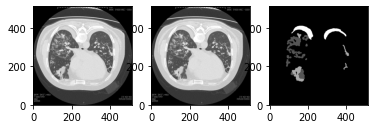

In [ ]:
import matplotlib.pyplot as plt
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = img_data[26, :, :]
slice_1 = img_data[:, 30, :]
slice_2 = img_numpy[:, :, 99]
slice_3 = mask_numpy[:, :, 99]
show_slices([slice_2, slice_2, slice_3])
# plt.suptitle("Center slices for EPI image")  

In [ ]:
img_data.shape

(512, 512, 100)

In [ ]:
img_nii.affine

array([[  -1. ,    0. ,    0. ,  255.5],
       [   0. ,    1. ,    0. , -255.5],
       [   0. ,    0. ,    1. ,  -49.5],
       [   0. ,    0. ,    0. ,    1. ]])

In [ ]:
M = img_nii.affine[:3, :3]
M

array([[-1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [ ]:
abc = img_nii.affine[:3, 3]
abc

array([ 255.5, -255.5,  -49.5])